In [16]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import Point, Polygon

In [3]:
data = pd.read_csv("fire_incidents.csv")
gdf = geopandas.read_file("neighborhoods.geojson")
datageom = pd.read_csv("neigh_geom.csv")

In [4]:
data = data.dropna(subset=['incident_type', 'alarm_time'])
data['alarm_time'] = pd.to_datetime(data['alarm_time'])
data = data[~(data['alarm_time'] < '2020-01-01')]

In [5]:
data = data[data.neighborhood.isin(datageom.hood)]

In [6]:
geom = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
incidents = geopandas.GeoDataFrame(data, geometry=geom)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


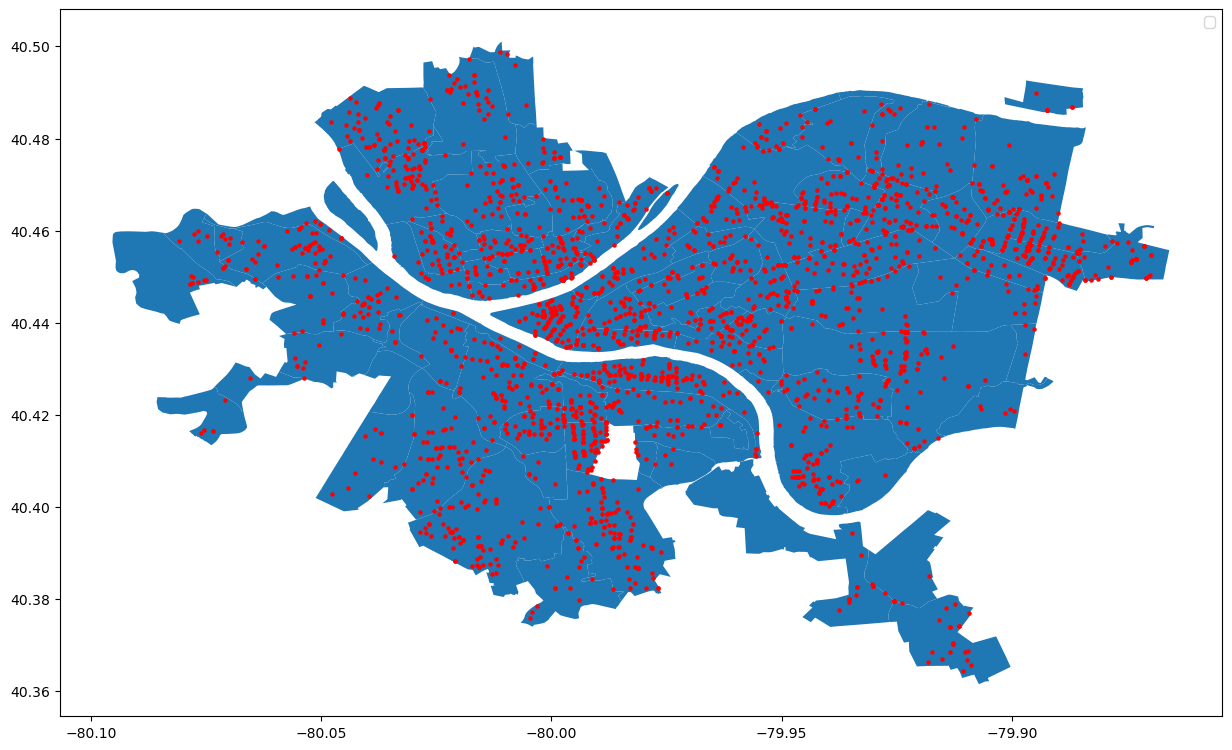

In [7]:
figure, ax = plt.subplots(figsize=(15,15))
gdf.plot(ax=ax)
incidents.plot(ax=ax,markersize=5, color="red")
plt.legend(prop={'size':10})

In [8]:
fires = data.groupby('neighborhood').size()
fires = fires.to_frame().reset_index()
fires.columns = ['hood', 'freq']
gdf = pd.merge(gdf, fires, on='hood')
gdf['fire_density']=gdf['freq']/gdf['acres']

In [14]:
datageom = pd.merge(datageom, fires, on='hood')
datageom['fire_density']=datageom['freq']/datageom['acres']

In [9]:
gdf.sort_values('fire_density')

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,last_edited_user,last_edited_date,temp,pghdb_sde_Neighborhood_2010_are,GlobalID,Shape__Area,Shape__Length,geometry,freq,fire_density
37,38,326,42,003,310300,1,420033103001,Block Group 1,G5030,S,...,SDE,2020-08-14 13:00:46+00:00,None,22145166.0,120c1315-5813-42fa-9303-b7c094d0c6ee,2.202310e+07,22675.182197,"POLYGON ((-79.91745 40.39898, -79.9166 40.3986...",2,0.003956
10,11,96,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,SDE,2020-08-14 12:59:58+00:00,None,12713036.0,ed73b2d5-7175-417f-9750-1dccb6473843,1.275334e+07,18602.718322,"POLYGON ((-79.92106 40.41203, -79.92084 40.411...",3,0.010247
25,26,221,42,003,562900,2,420035629002,Block Group 2,G5030,S,...,SDE,2020-08-14 13:00:04+00:00,None,48800708.0,b8f533f0-db52-404f-afea-e280bddfbd96,4.865042e+07,55129.930061,"POLYGON ((-79.95621 40.40944, -79.95612 40.409...",13,0.011640
7,8,313,42,003,562800,2,420035628002,Block Group 2,G5030,S,...,SDE,2020-08-14 13:00:57+00:00,None,7024962.0,253b724f-3c9d-4439-bf93-d912897f468c,7.036028e+06,15843.102719,"POLYGON ((-80.06328 40.42796, -80.06318 40.427...",2,0.012382
23,24,340,42,003,563000,1,420035630001,Block Group 1,G5030,S,...,SDE,2020-08-14 12:59:48+00:00,None,27002274.0,8ea999f0-868e-44ff-bd8f-1ccc3ee8b099,2.703064e+07,26643.534048,"POLYGON ((-80.08392 40.45947, -80.08425 40.459...",9,0.014504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,44,6,42,003,020100,4,420030201004,Block Group 4,G5030,S,...,SDE,2020-08-14 12:59:06+00:00,None,17846686.0,31b560f2-ca21-41de-ac55-0fe3fc8048e5,1.502223e+07,17837.723820,"POLYGON ((-79.99296 40.44497, -79.99233 40.444...",107,0.258952
5,6,286,42,003,130400,3,420031304003,Block Group 3,G5030,S,...,SDE,2020-08-14 13:00:15+00:00,None,11104194.0,fa665cfe-97d0-4827-a202-3bca7d917a22,1.079307e+07,16346.118997,"POLYGON ((-79.88666 40.45521, -79.88651 40.455...",76,0.306730
22,23,25,42,003,010300,2,420030103002,Block Group 2,G5030,S,...,SDE,2020-08-14 12:58:51+00:00,None,9127700.0,4be74de1-0d1d-4eb4-bd28-1a3ed6082592,9.067761e+06,15575.484378,"POLYGON ((-79.98506 40.43855, -79.98487 40.438...",66,0.317053
44,45,64,42,003,563200,3,420035632003,Block Group 3,G5030,S,...,SDE,2020-08-14 12:59:30+00:00,None,6577919.5,e15457c5-efd5-46be-9723-a8571e32e6c6,6.549070e+06,14652.640510,"POLYGON ((-79.99488 40.4593, -79.99528 40.4585...",63,0.419034


<Axes: >

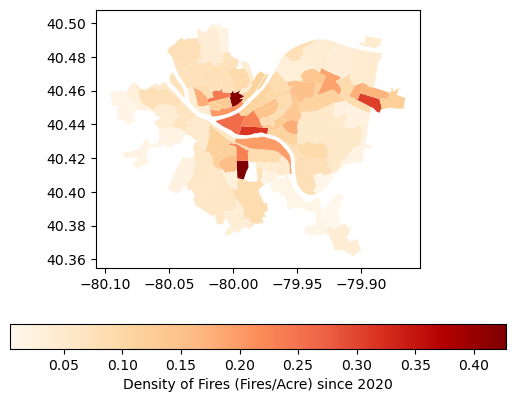

In [10]:
gdf.plot(column='fire_density', legend=True, cmap='OrRd', legend_kwds={"label": "Density of Fires (Fires/Acre) since 2020", "orientation": "horizontal"})

In [11]:
gdf

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,last_edited_user,last_edited_date,temp,pghdb_sde_Neighborhood_2010_are,GlobalID,Shape__Area,Shape__Length,geometry,freq,fire_density
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14 13:02:13+00:00,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455...",17,0.087978
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14 13:02:41+00:00,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443...",42,0.053641
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14 12:59:55+00:00,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.9353 40.4725...",40,0.136646
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14 12:58:41+00:00,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.4552, -79.96595 40.4548...",17,0.151203
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14 13:00:19+00:00,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418...",82,0.427618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,86,215,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,SDE,2020-08-14 13:02:20+00:00,None,5362860.0,93ce438e-e3ec-410d-a7fd-619646e25dc3,5.470266e+06,15761.679800,"POLYGON ((-79.89711 40.42762, -79.89663 40.427...",3,0.023889
85,87,211,42,003,051100,1,420030511001,Block Group 1,G5030,S,...,SDE,2020-08-14 13:02:58+00:00,None,9529806.0,2858633a-175e-459b-a4c9-9aac92bfe033,9.050536e+06,17830.507786,"POLYGON ((-79.95848 40.44846, -79.95872 40.448...",17,0.081820
86,88,153,42,003,562600,2,420035626002,Block Group 2,G5030,S,...,SDE,2020-08-14 12:59:44+00:00,None,16904768.0,fbc3ab11-0429-476e-80fd-700f969b204a,1.689127e+07,21714.648283,"POLYGON ((-80.03619 40.45073, -80.03496 40.449...",26,0.067050
87,89,16,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,SDE,2020-08-14 13:02:33+00:00,None,26083320.0,39308990-70d5-4da6-b2a0-a5510f18e9b9,2.576841e+07,34700.371969,"POLYGON ((-79.97726 40.43274, -79.97725 40.432...",117,0.197781


In [12]:
gdf = gdf.sort_values('fire_density')['hood']
gdf.head(10)

37     New Homestead
10        Glen Hazel
25              Hays
7            Oakwood
23         Fairywood
12          Westwood
81    Swisshelm Park
75       Summer Hill
28     East Carnegie
72         St. Clair
Name: hood, dtype: object

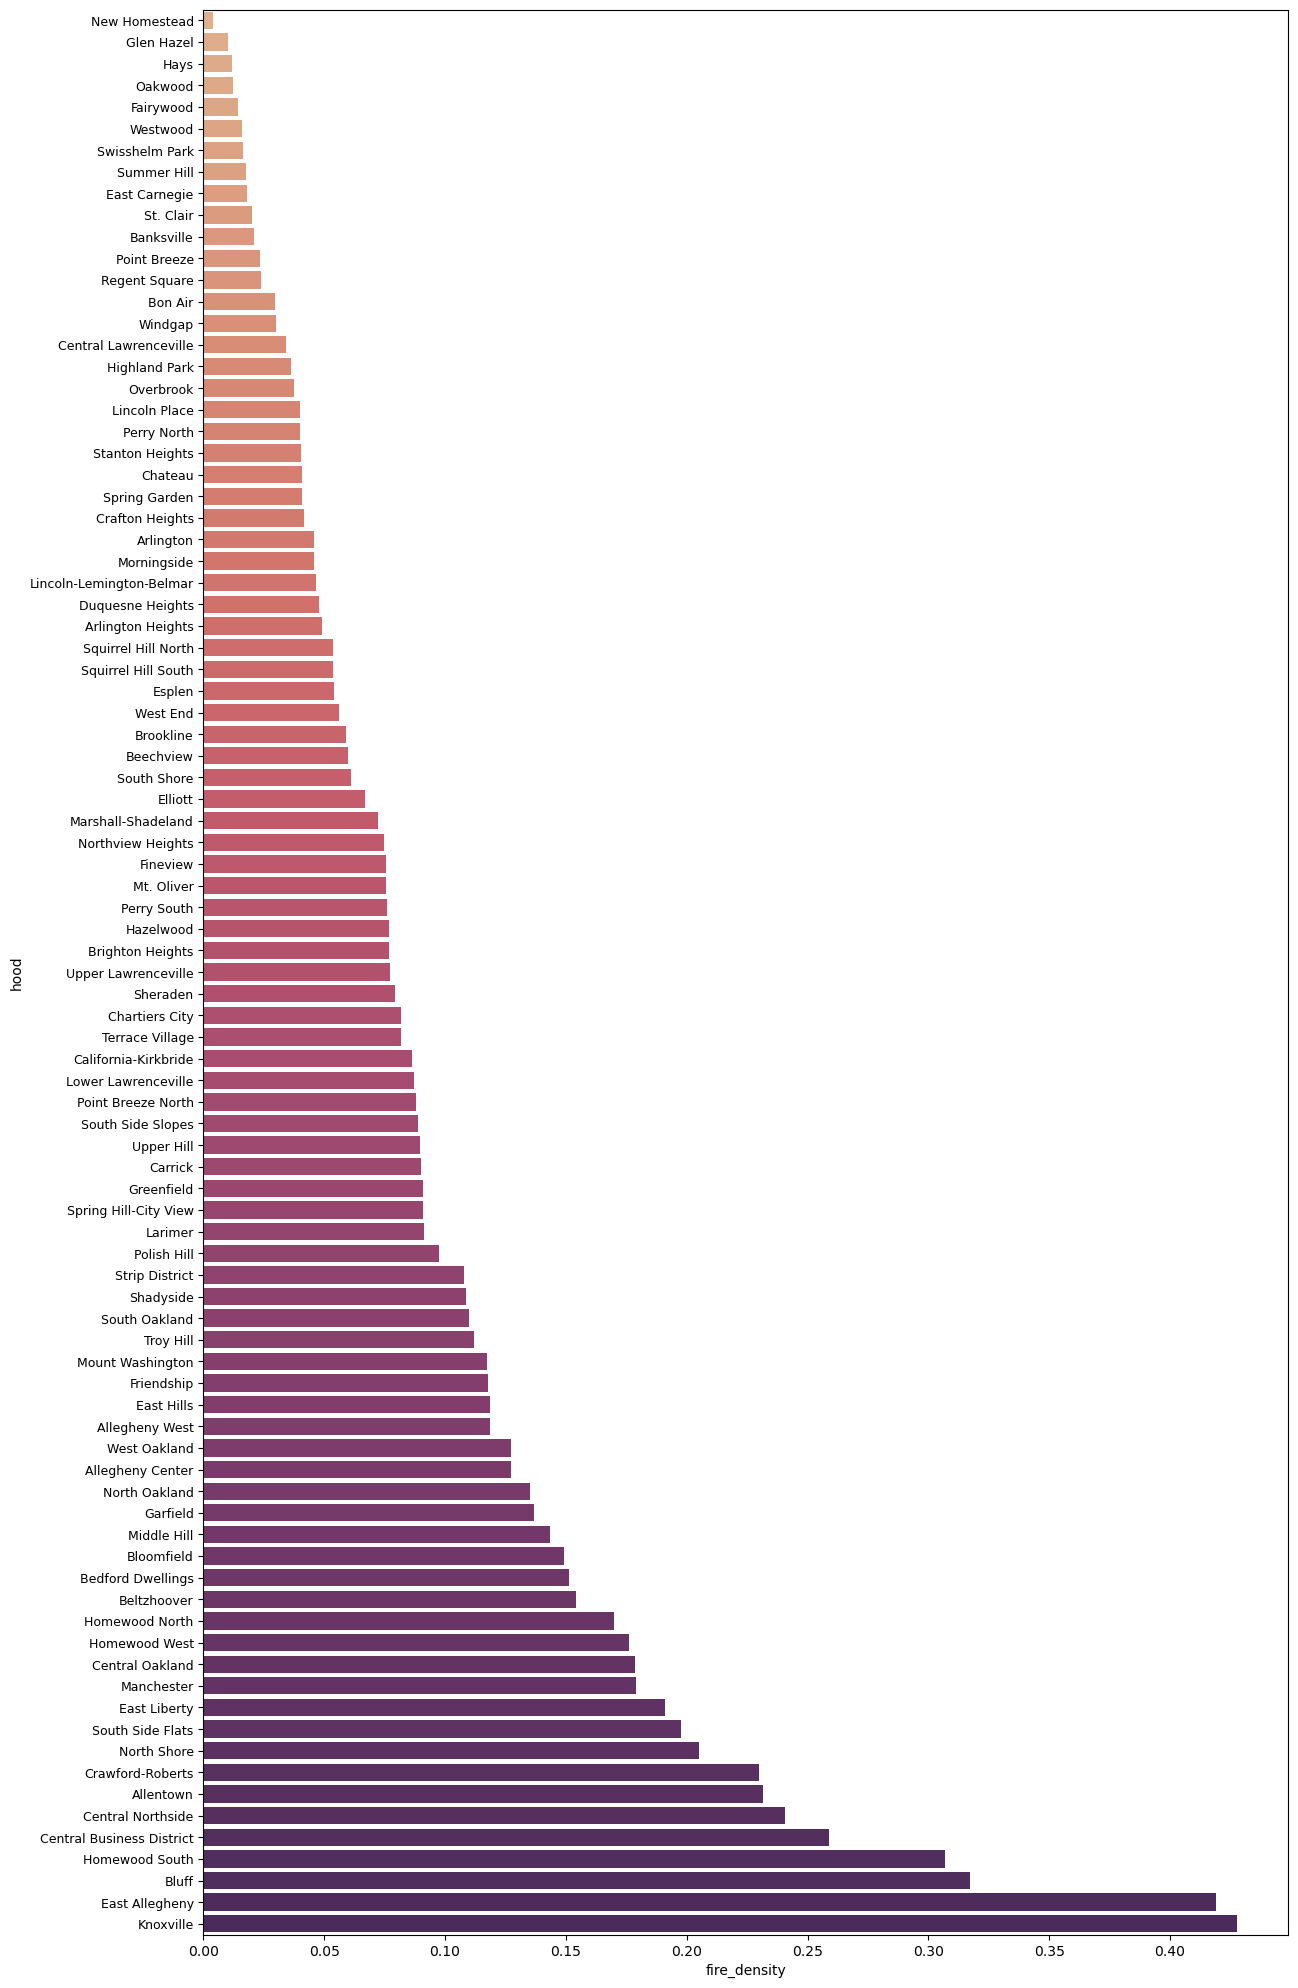

In [23]:
plt.figure(figsize=(14, 25))
datageom = datageom.sort_values('fire_density')
sns.barplot(data=datageom, y='hood', x='fire_density', palette='flare')
plt.yticks(fontsize=9)
plt.show()

From this data, the top 3 were New Homestead, Glen Hazel, and Hays, likely due to being more woodland areas. Overall, Hays seems to be the winner in safety.